In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
dataset = pd.read_csv('LondonTrajectoriesDataset.csv')

In [3]:
df = pd.DataFrame(data=dataset, columns=dataset.columns)

In [4]:
df.dropna(how='any',axis=0, inplace=True) 
df.drop(['coordinates'], axis=1, inplace=True)

In [5]:
target = pd.DataFrame(data=df['crimes'], columns=['crimes'])

In [6]:
features = df.copy()
features.drop(['crimes'], axis=1, inplace=True)

In [7]:
# features.drop(['ID'], axis=1, inplace=True)

In [8]:
# features.drop(['setID'], axis=1, inplace=True)

## Feature Selection

In [9]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(features, target)

In [10]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)


In [11]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']

In [12]:
x = 1.357e-05    
pd.set_option('display.float_format', '{:.4f}'.format)
featureScores

,Features,Score
0,ID,1670780.5967
1,crimeNorm,818.8784
2,accidentNorm,834.1315
3,natureNorm,1063.3496
4,attractionNorm,1833.8366
5,durationNorm,823.0777
6,trafficNorm,868.2117
7,lengthNorm,783.1956
8,setID,313260.5770
9,accidents,288874.1840


In [13]:
print(featureScores.nlargest(5,'Score')) 

    Features           Score
11    nature 1100358499.8818
14    length    9880003.5097
0         ID    1670780.5967
13  duration     715227.4373
8      setID     313260.5770


## Feature Importance

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()

In [15]:
model.fit(features, target.values.ravel())

ExtraTreesClassifier()

In [16]:
print(model.feature_importances_)

[0.07668239 0.06758326 0.06486847 0.06568937 0.0267691  0.06652795
 0.0674558  0.06724596 0.07416644 0.07669342 0.04070283 0.07510153
 0.07817715 0.07587593 0.0764604 ]


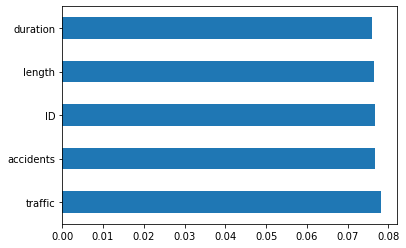

In [17]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

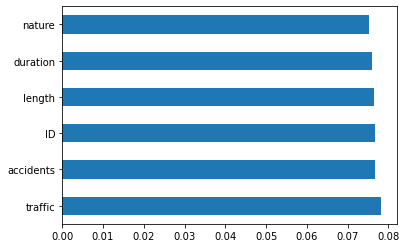

In [18]:

feat_importances.nlargest(6).plot.barh(x='Features')

In [21]:
feat_importances.nlargest(6)

traffic     0.0782
accidents   0.0767
ID          0.0767
length      0.0765
duration    0.0759
nature      0.0751
dtype: float64

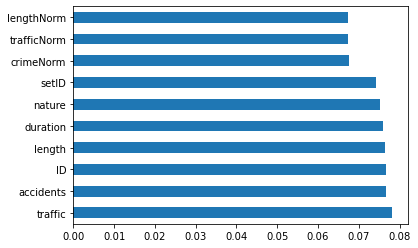

In [19]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()